In [1]:
%matplotlib inline
import cv2, os, sys, base64
import matplotlib.pyplot as plt
import timeit
import numpy as np

plt.ion()


In [4]:
import xdrive_pb2, server

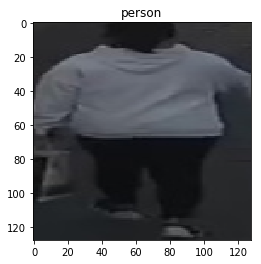

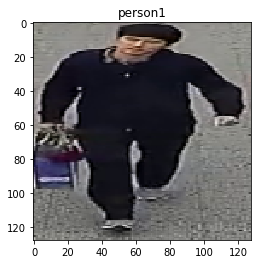

In [5]:
person = cv2.imread("/home/ftian/BJVideo/img/person.jpg")
person = cv2.resize(person, (128,128))
# plt.
person_cvt = cv2.cvtColor(person, cv2.COLOR_BGR2RGB)
plt.imshow(person_cvt)
plt.title("person")
plt.show()

person1 = cv2.imread("/home/ftian/BJVideo/img/person1.png")
person1 = cv2.resize(person1, (128,128))
person1_cvt = cv2.cvtColor(person1, cv2.COLOR_BGR2RGB)
# plt.rcParams['figure.figsize'] = [24.0,16.0]
plt.imshow(person1_cvt)
plt.title("person1")
plt.show()


In [7]:
sock = server.cli_connect("/tmp/ml.socket")

In [8]:
xmsg = xdrive_pb2.XMsg()
col1 = xmsg.rowset.columns.add()
col1.nrow = 1
col1.nullmap.append(False)
col1.sdata.append("/home/ftian/BJVideo/rename/bj-3.mp4")
col2 = xmsg.rowset.columns.add()
col2.nrow = 1
col2.nullmap.append(False)
col2.f32data.append(9.0) 
col3 = xmsg.rowset.columns.add()
col3.nrow = 1
col3.nullmap.append(False)
col3.f32data.append(0.1) 

server.writeXMsg(sock, xmsg)
ret = server.readXMsg(sock)
rcol1 = ret.rowset.columns[0]
rcol2 = ret.rowset.columns[1]
rcol3 = ret.rowset.columns[2]
rcol4 = ret.rowset.columns[3]
rcol5 = ret.rowset.columns[4]
rcol6 = ret.rowset.columns[5]
rcol7 = ret.rowset.columns[6]
rcol8 = ret.rowset.columns[7]

nrow = ret.rowset.columns[0].nrow
for i in range(nrow):
    print("Frame {0}, Class {1}, Score: {2}\n".format(rcol1.i32data[i], rcol2.sdata[i], rcol3.f32data[i]))
    print("    Bounding Box: [{0}, {1}, {2}, {3}]\n".format(
                rcol4.f32data[i],
                rcol5.f32data[i],
                rcol6.f32data[i],
                rcol7.f32data[i]
    ))


Frame 1, Class car, Score: 0.30207157135

    Bounding Box: [1.0, 292.0, 164.0, 230.0]

Frame 1, Class car, Score: 0.109161123633

    Bounding Box: [1756.0, 494.0, 1813.0, 462.0]

Frame 1, Class car, Score: 0.10015643388

    Bounding Box: [1609.0, 554.0, 1692.0, 513.0]

Frame 1, Class car, Score: 0.14810064435

    Bounding Box: [1783.0, 536.0, 1834.0, 492.0]

Frame 1, Class person, Score: 0.120752841234

    Bounding Box: [1209.0, 729.0, 1277.0, 616.0]

Frame 1, Class person, Score: 0.153203010559

    Bounding Box: [1297.0, 746.0, 1356.0, 616.0]

Frame 1, Class person, Score: 0.102720461786

    Bounding Box: [1538.0, 730.0, 1589.0, 653.0]

Frame 1, Class person, Score: 0.130003958941

    Bounding Box: [1623.0, 725.0, 1688.0, 641.0]

Frame 1, Class person, Score: 0.272810429335

    Bounding Box: [1821.0, 757.0, 1871.0, 656.0]

Frame 1, Class bicycle, Score: 0.120567083359

    Bounding Box: [1208.0, 804.0, 1269.0, 698.0]

Frame 1, Class person, Score: 0.200876697898

    Bounding

In [1]:
vc = cv2.VideoCapture("/home/ftian/BJVideo/rename/bj-3.mp4")
vc.set(1, 226)
ok, frame = vc.read()
h, w, c = frame.shape
print ("{0}, {1}, {2}".format(h, w, c))
show = plt.imshow(frame)



NameError: name 'cv2' is not defined

NROW: 37
Frame 1, Class person, Score: 0.120752841234

    Bounding Box: [1209.0, 729.0, 1277.0, 616.0]

         Matching 0.188435062766, 0.0542646087706

Frame 1, Class person, Score: 0.153203010559

    Bounding Box: [1297.0, 746.0, 1356.0, 616.0]

         Matching 0.225760385394, -0.0164930317551

Frame 1, Class person, Score: 0.102720461786

    Bounding Box: [1538.0, 730.0, 1589.0, 653.0]

         Matching -0.0416822731495, 0.172879502177

Frame 1, Class person, Score: 0.130003958941

    Bounding Box: [1623.0, 725.0, 1688.0, 641.0]

         Matching 0.13780669868, 0.157534241676

Frame 1, Class person, Score: 0.272810429335

    Bounding Box: [1821.0, 757.0, 1871.0, 656.0]

         Matching -0.0425603687763, 0.0549987442791

Frame 1, Class person, Score: 0.200876697898

    Bounding Box: [1443.0, 838.0, 1500.0, 697.0]

         Matching 0.024505501613, 0.285732358694

Frame 1, Class person, Score: 0.119730301201

    Bounding Box: [744.0, 1535.0, 824.0, 1447.0]

         Mat

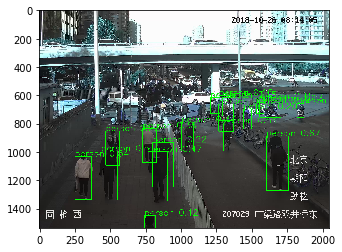

In [10]:
def drawbox(img, tag, score, llx, lly, urx, ury):
    # CV2 draw rectange with top-left, bottom-right, 
    txt = "{0} {1:0.2f}".format(tag, score)
    # print("Drawing box: ({0}, {1}), ({2}, {3}), with text {4}".format(llx, ury, urx, lly, txt))
    cv2.rectangle(img, (llx, ury), (urx, lly), (0, 255, 0), 3)
    cv2.putText(img, txt, (llx, ury), 0, 2, (2,255,0), 2, cv2.LINE_AA)

print ("NROW: {0}".format(nrow))
for i in range(nrow):
    if rcol2.sdata[i] != "person" or rcol8.sdata[i] == "":
        continue
    
    # if rcol4.f32data[i] >= 200:
    #    continue

    print("Frame {0}, Class {1}, Score: {2}\n".format(rcol1.i32data[i], rcol2.sdata[i], rcol3.f32data[i]))
    print("    Bounding Box: [{0}, {1}, {2}, {3}]\n".format(
                rcol4.f32data[i],
                rcol5.f32data[i],
                rcol6.f32data[i],
                rcol7.f32data[i]
    ))
    drawbox(frame, rcol2.sdata[i], rcol3.f32data[i], 
                int(rcol4.f32data[i]), int(rcol5.f32data[i]),
                int(rcol6.f32data[i]), int(rcol7.f32data[i]))
 
    jpgstr = base64.b64decode(rcol8.sdata[i])
    jpgarr = np.frombuffer(jpgstr, np.uint8)
    jpg = cv2.imdecode(jpgarr, cv2.IMREAD_COLOR)
    jpg = cv2.resize(jpg, (128, 128))
    
    # Seems, cv2.TM_CCOEFF_NORMED is the right one.
    # methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR, cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]
    # for m in methods:
    # 
    match = cv2.matchTemplate(jpg, person, cv2.TM_CCOEFF_NORMED)
    match2 = cv2.matchTemplate(jpg, person1, cv2.TM_CCOEFF_NORMED)
    print ("         Matching {0}, {1}\n".format(match[0][0], match2[0][0]))
    
    # plt.imshow(jpg)
show = plt.imshow(frame)

Current working directory: /home/ftian/oss/ml-suite/toybook
Running on host: ftian-XPS-8930
Running w/ LD_LIBRARY_PATH: /home/ftian/oss/ml-suite/overlaybins/1525/runtime/lib/x86_64/:/home/ftian/oss/ml-suite/xfdnn/rt/xdnn_cpp/build/lib:/home/ftian/oss/ml-suite/xfdnn/rt/lib:/home/ftian/oss/ml-suite/ext/boost/lib:/home/ftian/oss/ml-suite/ext/zmq/libs:/home/ftian/oss/ml-suite
Running w/ XILINX_OPENCL: /home/ftian/oss/ml-suite/overlaybins/1525
Running w/ XCLBIN_PATH: /home/ftian/oss/ml-suite/overlaybins/1525
Running w/ PYTHONPATH: /home/ftian/oss/ml-suite:/home/ftian/oss/ml-suite/apps/yolo:/home/ftian/oss/ml-suite/apps/yolo/nms:/home/ftian/oss/ml-suite/xfdnn/rt:/home/ftian/oss/ml-suite/xfdnn/tools/emu:/home/ftian/oss/ml-suite/xfdnn/tools/compile/network:/home/ftian/oss/ml-suite/xfdnn/tools/compile/graph:/home/ftian/oss/ml-suite/xfdnn/tools/compile/optimizations:/home/ftian/oss/ml-suite/xfdnn/tools/compile/codegeneration:/home/ftian/oss/ml-suite/xfdnn/tools/compile/memory:/home/ftian/oss/ml-

Runnning on VCU1525
